In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import time

In [2]:
adata = sc.datasets.paul15()
adata

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

In [3]:
# Select top 1000 highly-variable genes
filter_result = sc.pp.filter_genes_dispersion(adata.X,flavor='cell_ranger',n_top_genes=1000,log=False)
# Subset the genes
adata = adata[:, filter_result.gene_subset]
# Log transformation and scaling
sc.pp.log1p(adata)

C:\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:398: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


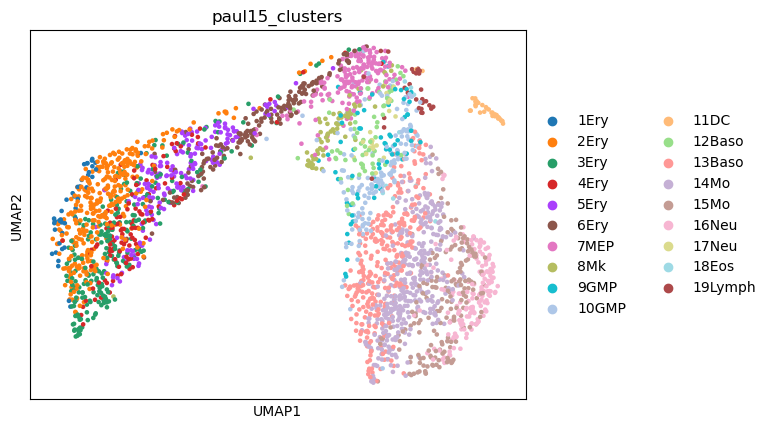

In [4]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['paul15_clusters'])

In [5]:
data_clusters = adata.obs['paul15_clusters']
zip_types = dict(zip(data_clusters.cat.categories,adata.uns['paul15_clusters_colors']))
cell_clusters  =  [zip_types[i] for i in data_clusters.values]

In [6]:
from dtne import *

The code runs 10s.


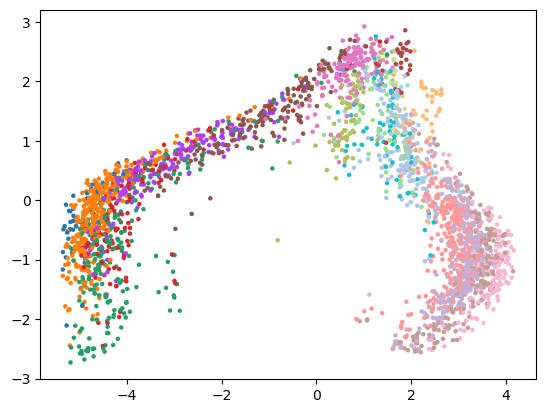

In [7]:
start_time = time.time()
embedding = DTNE(k_neighbors = 30) 
Y = embedding.fit_transform(adata.X)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y[:,0], Y[:,1], c=cell_clusters,s=5,cmap='jet')

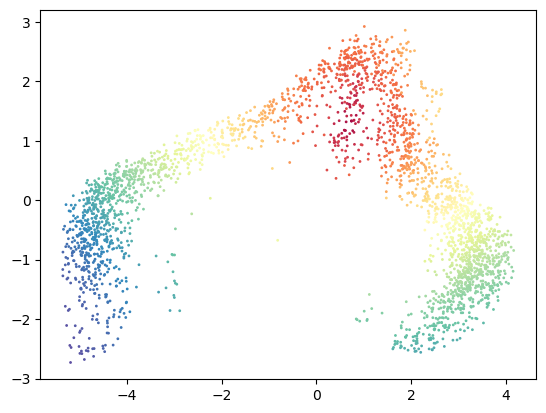

In [8]:
diff_time = embedding.order_cells(root_cells=[840])
plt.scatter(Y[:,0], Y[:,1],c=diff_time,s=1,cmap='Spectral')

In [9]:
pd.DataFrame(-Y).to_csv('paul.Y_dtne.csv')
pd.DataFrame(diff_time).to_csv('paul.dtne_pseudotime.csv')